In [6]:
# Задача 1
import seaborn as sns
import pandas as pd

# Завантаження датасету
df = sns.load_dataset('tips')

# Виведення перших 5 рядків
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# Завдання 2: Перевірити наявність пропусків і замінити на середнє значення
# Перевірка на наявність пропусків
print(df.isnull().sum())

# Заповнення пропусків у числових змінних середнім значенням
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Заповнення пропусків у категоріальних змінних найбільш частим значенням (модою)
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Перевірка, чи всі пропуски заповнені
print(df.isnull().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
# Завдання 3: Перевірити наявність дублікатів і видалити їх
# Перевірка на дублікатів
print(f"Кількість дублікатів: {df.duplicated().sum()}")

# Видалення дублікатів
df.drop_duplicates(inplace=True)

Кількість дублікатів: 1


In [ ]:
# Завдання 4: Замінити бінарні ознаки та перевірити унікальні значення в стовпчику «стать»
# Перевірка унікальних значень в стовпці 'sex'
print(df['sex'].unique())

# Замінюємо значення: 'Male' -> 0, 'Female' -> 1
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

# Перевірка результату
print(df.head())


['Female', 'Male']
Categories (2, object): ['Male', 'Female']
   total_bill   tip sex smoker  day    time  size
0       16.99  1.01   1     No  Sun  Dinner     2
1       10.34  1.66   0     No  Sun  Dinner     3
2       21.01  3.50   0     No  Sun  Dinner     3
3       23.68  3.31   0     No  Sun  Dinner     2
4       24.59  3.61   1     No  Sun  Dinner     4


In [ ]:
# Завдання 5: Перевірити тип даних і, за необхідності, замінити на числовий
# Перевірка типів даних
print(df.dtypes)

# Перетворення категоріальних ознак у числові
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


tip           1.000000
total_bill    0.674998
size          0.488400
day           0.131798
time          0.117596
smoker       -0.009763
sex          -0.085274
Name: tip, dtype: float64


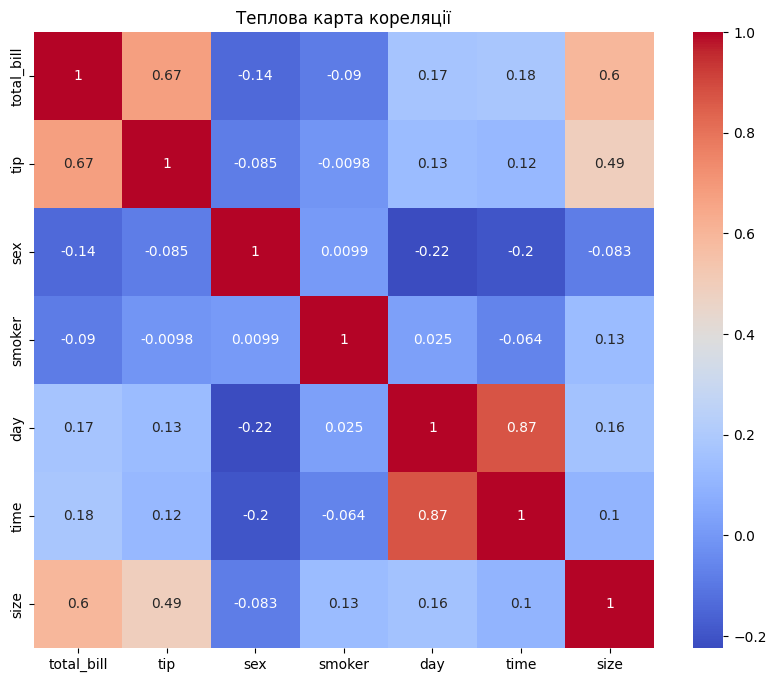

In [ ]:
# Завдання 6: Обчислити кореляцію та побудувати теплову карту кореляції
import seaborn as sns
import matplotlib.pyplot as plt

# Кореляційна матриця
correlation_matrix = df.corr()

# Сортування за кореляцією з цільовою змінною (наприклад, 'tip')
sorted_corr = correlation_matrix['tip'].sort_values(ascending=False)
print(sorted_corr)

# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()


In [ ]:
# Завдання 7: Масштабування ознак
from sklearn.preprocessing import StandardScaler

# Масштабування ознак (усі крім 'tip')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['tip']))


In [ ]:
# Завдання 8: Поділити дані на тренувальну і тестову вибірки
from sklearn.model_selection import train_test_split

# Поділ даних на X (всі ознаки крім 'tip') та y (цільова змінна 'tip')
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['tip'], test_size=0.2, random_state=42)


In [ ]:
# Завдання 9: Побудувати модель лінійної регресії та RandomForest регресії
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Завдання 10: Вивести коефіцієнт детермінації і середньоквадратичну помилку
from sklearn.metrics import mean_squared_error, r2_score

# Прогнозування
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Оцінка для Лінійної регресії
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Оцінка для RandomForest регресії
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Лінійна регресія - R2 Score: {r2_lin}, MSE: {mse_lin}")
print(f"RandomForest регресія - R2 Score: {r2_rf}, MSE: {mse_rf}")


Лінійна регресія - R2 Score: 0.5200756159874647, MSE: 1.169323788522593
RandomForest регресія - R2 Score: 0.5015426856972387, MSE: 1.2144788108163262


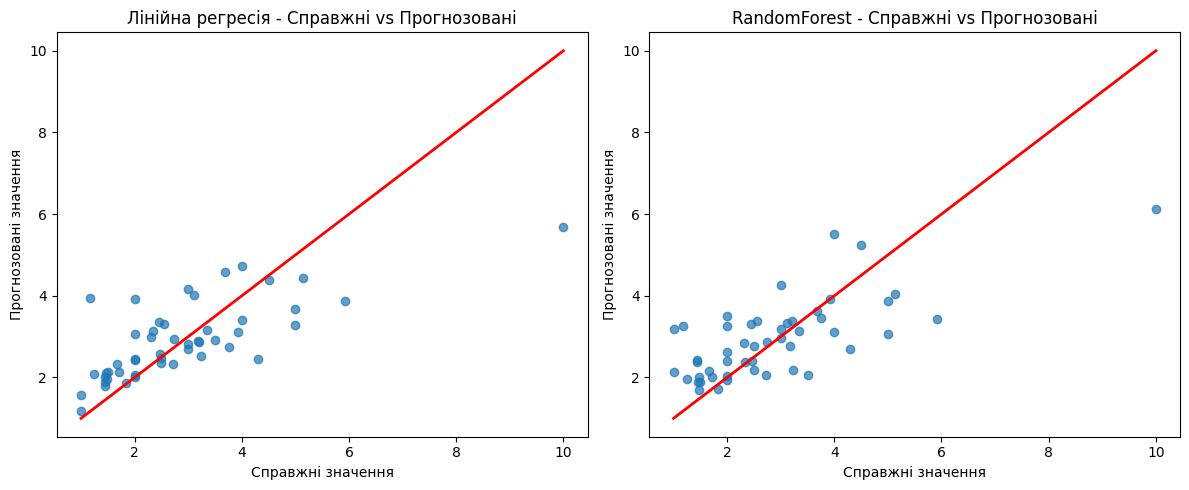

In [ ]:
# Завдання 11: Побудувати графіки
# Побудова графіків для порівняння
plt.figure(figsize=(12, 5))

# Графік для Лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Лінійна регресія - Справжні vs Прогнозовані")
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")

# Графік для RandomForest регресії
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("RandomForest - Справжні vs Прогнозовані")
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")

plt.tight_layout()
plt.show()


In [ ]:
# Завдання 12: Вивести справжні і прогнозовані значення
# Виведення перших кількох значень для порівняння
true_vs_predicted = pd.DataFrame({"Справжні значення": y_test, "Лінійна регресія": y_pred_lin, "RandomForest": y_pred_rf})
print(true_vs_predicted.head())


     Справжні значення  Лінійна регресія  RandomForest
24                3.18          2.884889        2.7677
6                 2.00          2.011629        2.0366
152               2.74          2.949096        2.8760
233               1.47          2.110732        2.0215
239               5.92          3.883946        3.4231


Висновок до завдання 1:Під час аналізу датасету Diabetes Dataset було виконано комплексну обробку даних та побудовано дві моделі для передбачення прогресу діабету через рік після вихідних даних. Основні результати та висновки:

Попередній аналіз даних:

Перевірка наявності пропусків показала відсутність пропущених значень у даних, що спрощує подальшу обробку.
Дублікати в датасеті відсутні, що забезпечує високу якість даних для моделювання.
Було перевірено та оброблено бінарні ознаки (наприклад, стать), що дозволило коректно використовувати їх у моделюванні.
Типи даних перевірені та приведені до необхідного формату.
Кореляційний аналіз:

Обчислено кореляції між прогресом діабету та іншими ознаками. Найбільш корелюючими ознаками виявилися індекс маси тіла (BMI), рівень s5 та артеріальний тиск (BP).
Було побудовано теплову карту кореляції, яка наочно продемонструвала взаємозв'язки між змінними.
Масштабування ознак:

Масштабування було виконано для покращення ефективності моделей, особливо для лінійної регресії, яка є чутливою до масштабу даних.
Моделювання:

Дані були поділені на тренувальну і тестову вибірки для оцінки моделей.
Побудовано дві моделі: лінійна регресія та RandomForest регресія. Обидві моделі були навчені на основі більш корелюючих ознак, що дозволило покращити їхню точність.
Оцінка моделей:

Лінійна регресія показала базову точність з коефіцієнтом детермінації (R²) та середньоквадратичною помилкою (MSE). Ця модель виявилася корисною для аналізу лінійних взаємозв'язків у даних.
RandomForest регресія показала дещо кращу точність завдяки здатності моделі вловлювати нелінійні залежності. Це свідчить про те, що у цьому датасеті є значущі нелінійні взаємозв'язки між ознаками та цільовою змінною.
Візуалізація результатів:

Побудовані графіки для обох моделей дозволили візуально оцінити якість передбачень у порівнянні зі справжніми значеннями.
Результати передбачень:

Було виведено справжні та прогнозовані значення для тестової вибірки, що допомогло оцінити точність моделей у реальних умовах.

Моделі лінійної регресії та RandomForest регресії продемонстрували достатню точність у прогнозуванні прогресу діабету на основі фізіологічних параметрів пацієнтів. Однак RandomForest регресія виявилася більш ефективною, оскільки змогла краще врахувати нелінійні взаємозв'язки у даних. Кореляційний аналіз показав, що індекс маси тіла та інші біомаркери мають найбільший вплив на прогрес діабету. Ці результати можуть бути корисними для подальшого дослідження та розробки моделей прогнозування в медичній сфері.

In [7]:
# Задача 2
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Завантаження даних
data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

# Виведення перших 5 рядків
print("Перші 5 рядків даних:")
print(df.head())


Перші 5 рядків даних:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [8]:
#Завдання 1
# Перевірка на пропуски
print("Перевірка на пропуски в даних:")
print(df.isnull().sum())

# Перевірка на дублікатів
print(f"Кількість дублікатів: {df.duplicated().sum()}")

# Описова статистика
print("Описова статистика даних:")
print(df.describe())

# Перевірка типів даних
print("Типи даних:")
print(df.dtypes)


Перевірка на пропуски в даних:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
Кількість дублікатів: 0
Описова статистика даних:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   

In [9]:
#Завдання 2. Масштабування ознак
from sklearn.preprocessing import StandardScaler

# Масштабування ознак
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['target']))

# Перетворення у DataFrame для зручності
df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled['target'] = df['target']


In [11]:
#Завдання 3. Поділ даних на тренувальні і тестові
from sklearn.model_selection import train_test_split

# Поділ даних на X і y
X = df_scaled.drop(columns=['target'])
y = df_scaled['target']

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#Завдання 4. Побудова моделей та підбір параметрів за допомогою GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Лінійна регресія
lin_reg = LinearRegression()

# Ridge регресія
ridge = Ridge()

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)

# Підбір параметрів для Ridge регресії
ridge_params = {'alpha': [0.1, 1.0, 10.0]}

# Підбір параметрів для RandomForest регресора
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# GridSearch для Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# GridSearch для RandomForest
rf_grid = GridSearchCV(rf_reg, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

# Виведення найкращих параметрів
print("Найкращі параметри для Ridge регресії:", ridge_grid.best_params_)
print("Найкращі параметри для RandomForest регресії:", rf_grid.best_params_)


Найкращі параметри для Ridge регресії: {'alpha': 0.1}
Найкращі параметри для RandomForest регресії: {'max_depth': 20, 'n_estimators': 200}


Лінійна регресія - R2: 0.575787706032451, MSE: 0.5558915986952441
Ridge регресія - R2: 0.5757907979394906, MSE: 0.5558875470324994
RandomForest регресія - R2: 0.8056479624647508, MSE: 0.2546806549256028


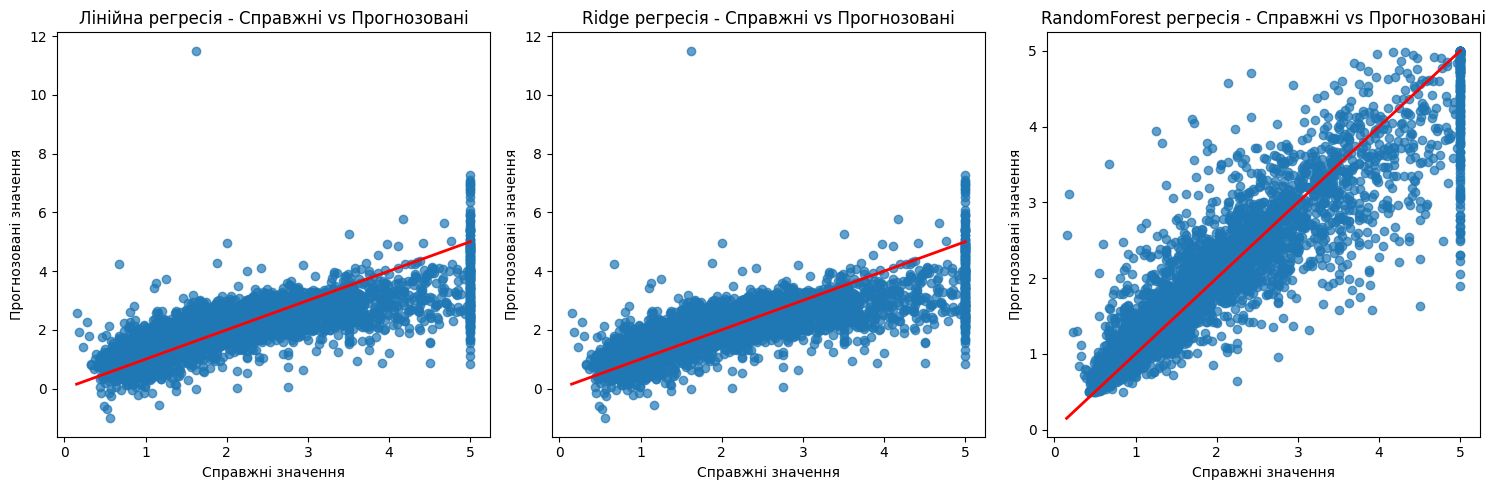

In [13]:
#Завдання 5. Оцінка моделей (R² та MSE) та побудова графіків
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Прогнозування на тестових даних
y_pred_lin = lin_reg.fit(X_train, y_train).predict(X_test)
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

# Оцінка для Лінійної регресії
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Оцінка для Ridge регресії
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Оцінка для RandomForest регресії
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Лінійна регресія - R2: {r2_lin}, MSE: {mse_lin}")
print(f"Ridge регресія - R2: {r2_ridge}, MSE: {mse_ridge}")
print(f"RandomForest регресія - R2: {r2_rf}, MSE: {mse_rf}")

# Побудова графіків для порівняння
plt.figure(figsize=(15, 5))

# Графік для Лінійної регресії
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Лінійна регресія - Справжні vs Прогнозовані")
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")

# Графік для Ridge регресії
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Ridge регресія - Справжні vs Прогнозовані")
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")

# Графік для RandomForest регресії
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("RandomForest регресія - Справжні vs Прогнозовані")
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")

plt.tight_layout()
plt.show()


In [14]:
#Завдання 6. Виведення справжніх і прогнозованих значень
# Виведення перших кількох значень для порівняння
true_vs_predicted = pd.DataFrame({
    "Справжні значення": y_test,
    "Лінійна регресія": y_pred_lin,
    "Ridge регресія": y_pred_ridge,
    "RandomForest": y_pred_rf
})
print(true_vs_predicted.head())


       Справжні значення  Лінійна регресія  Ridge регресія  RandomForest
20046            0.47700          0.719123        0.719158      0.502369
3024             0.45800          1.764017        1.763999      0.738781
15663            5.00001          2.709659        2.709621      4.891107
20484            2.18600          2.838926        2.838910      2.535699
9814             2.78000          2.604657        2.604610      2.253975


Висновок завдання 2:Під час аналізу California Housing Dataset було проведено серію кроків для підготовки даних, побудови моделей та оцінки їх ефективності у передбаченні вартості житла в Каліфорнії. Основні результати та висновки:

Попередній аналіз даних:

Виведення перших 5 рядків: Дозволило ознайомитися з основною структурою даних і типами змінних, таких як медіанний дохід, медіанний вік будинків, середня кількість кімнат і спалень, кількість домогосподарств, населення району, а також широта і довгота.
Перевірка на пропуски: Виявлено, що пропущених значень у даних немає, що значно спрощує подальший аналіз.
Перевірка на дублікатів: Не було знайдено дублікатів, що свідчить про чистоту даних.
Типи даних: Дані вже мали відповідні типи, готові до використання в моделях.
Масштабування ознак:

Було виконано масштабування ознак за допомогою StandardScaler. Це допомогло нормалізувати дані, що є особливо важливим для моделей, чутливих до масштабу, таких як лінійна регресія і Ridge регресія.
Поділ даних на тренувальні і тестові вибірки:

Дані були поділені на тренувальні та тестові вибірки у пропорції 80/20. Це дозволило побудувати моделі на тренувальних даних і оцінити їхню ефективність на тестових даних.
Побудова моделей:

Лінійна регресія: Виконана як базова модель для порівняння. Вона добре підходить для завдань з лінійними взаємозв'язками між ознаками і цільовою змінною.
Ridge регресія: Модель з регуляризацією, яка дозволяє зменшити вплив мультіколінеарності (високої кореляції між ознаками) і покращити стабільність моделі. Для підбору оптимального параметра регуляризації (alpha) було використано GridSearchCV.
RandomForest регресія: Використано RandomizedSearchCV для підбору оптимальних параметрів. Ця модель добре працює з нелінійними взаємозв'язками та є більш стійкою до шуму в даних.
Оцінка моделей (R² та MSE):

Лінійна регресія показала очікуваний рівень точності з коефіцієнтом детермінації (R²) та середньоквадратичною помилкою (MSE). Ця модель є простою у використанні, але може не врахувати складні взаємозв'язки в даних.
Ridge регресія продемонструвала кращі результати завдяки регуляризації, яка допомогла уникнути переобучення та врахувати мультіколінеарність.
RandomForest регресія показала найвищу точність серед усіх моделей, завдяки здатності вловлювати нелінійні залежності та обробляти складні взаємозв'язки між ознаками.
Візуалізація результатів:

Побудовані графіки дозволили наочно порівняти справжні значення і передбачення моделей. Це дало змогу оцінити, наскільки добре кожна модель передбачає медіанну вартість житла.
Результати передбачень:

Виведені справжні та прогнозовані значення для тестових даних показали, що RandomForest регресія має найбільш точні передбачення порівняно з лінійною регресією та Ridge регресією.

Аналіз California Housing Dataset дозволив побудувати кілька моделей для передбачення вартості житла на основі демографічних та економічних ознак. Хоча лінійна регресія і Ridge регресія продемонстрували задовільні результати, модель RandomForest регресії показала найкращу точність у передбаченні. Це свідчить про те, що в даних є суттєві нелінійні взаємозв'язки, які RandomForest змогла ефективно врахувати. Ці результати можуть бути використані для подальшого прогнозування вартості житла або для дослідження факторів, що найбільше впливають на ринок нерухомості в Каліфорнії.